In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
data = pd.read_csv("Boswell Data.csv")
data.dropna(inplace=True)
data = data.drop(['PLAY #'], axis=1)
data = data.drop(["ODK"], axis=1)
data = data.drop(["GN/LS"], axis=1)
data = data.replace("Y",1)
data = data.replace("N",0)
data = data.rename(columns={"YARD LN":"YD_LN"})
data = data.rename(columns={"PLAY TYPE":"PLAY_TYPE"})
data = data.rename(columns={'OFF FORM': 'OFF_FORM'})
data = data.rename(columns={"BITZ Y/N":"BLITZ"})

In [324]:
data = data.replace("LUCY", int(0))
data = data.replace("LUCY OVER", int(1))
data = data.replace("LUCY X", int(2))
data = data.replace("RICKY", int(3))
data = data.replace("RICKY OVER", int(4))
data = data.replace("RICKY OVER LIZ", int(5))
data = data.replace("RICKY X", int(6))
data = data.replace("TRIPS", int(7))

In [325]:
data = data.replace("Run", 0)
data = data.replace("Pass", 1)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 74
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   DN         74 non-null     int64
 1   DIST       74 non-null     int64
 2   YD_LN      74 non-null     int64
 3   PLAY_TYPE  74 non-null     int64
 4   OFF_FORM   74 non-null     int64
 5   BLITZ      74 non-null     int64
dtypes: int64(6)
memory usage: 4.0 KB


In [327]:
data.loc[data["YD_LN"] < 0, "YD_LN"] = (data["YD_LN"] - 50) * -1

In [328]:
pd.set_option('display.max_rows', 100)
data

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
0,3,8,18,0,0,1
1,1,10,85,0,0,0
2,1,10,94,1,6,0
3,2,8,8,0,4,0
4,2,6,74,0,1,0
5,1,20,75,1,0,1
6,3,2,37,0,4,1
7,1,10,26,0,3,0
8,3,3,89,0,1,0
9,3,18,28,1,4,1


In [329]:
data.corr()

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
DN,1.000000,-0.310078,-0.039939,0.154850,0.103342,0.129881
DIST,-0.310078,1.000000,0.079869,0.147344,-0.171690,0.222368
YD_LN,-0.039939,0.079869,1.000000,0.000852,-0.180774,0.014409
PLAY_TYPE,0.154850,0.147344,0.000852,1.000000,0.332791,0.261112
OFF_FORM,0.103342,-0.171690,-0.180774,0.332791,1.000000,-0.156736
BLITZ,0.129881,0.222368,0.014409,0.261112,-0.156736,1.000000


<Axes: >

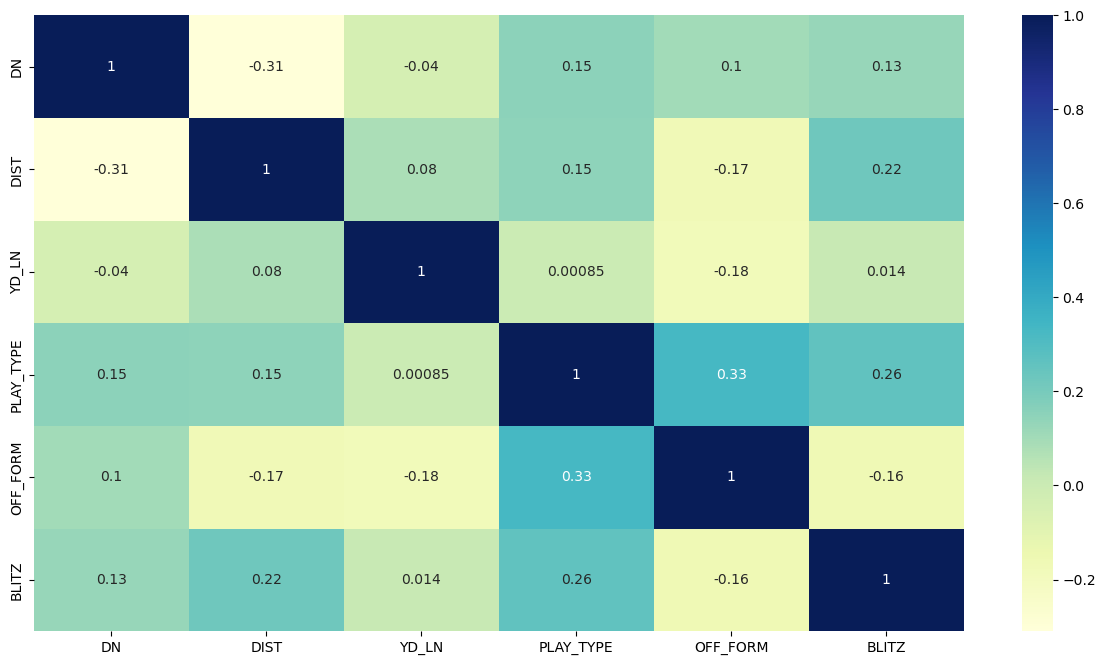

In [330]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'DN'}>, <Axes: title={'center': 'DIST'}>],
       [<Axes: title={'center': 'YD_LN'}>,
        <Axes: title={'center': 'PLAY_TYPE'}>],
       [<Axes: title={'center': 'OFF_FORM'}>,
        <Axes: title={'center': 'BLITZ'}>]], dtype=object)

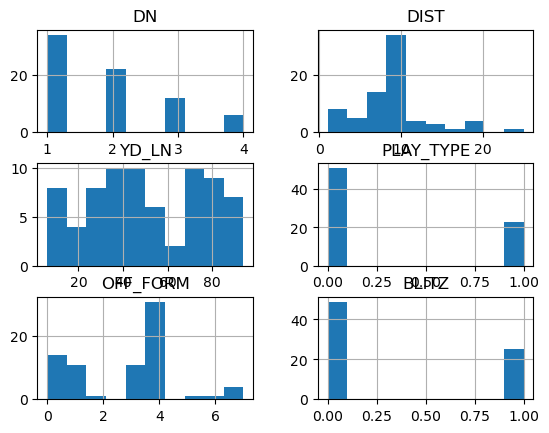

In [331]:
data.hist()

In [332]:
from sklearn.model_selection import train_test_split

X = data.drop(["BLITZ"], axis=1)
y = data["BLITZ"]

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [334]:
train_data = X_train.join(y_train)

In [335]:
train_data

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
73,2,9,81,1,7,0
41,2,11,69,0,1,0
53,2,4,34,0,1,0
4,2,6,74,0,1,0
15,2,13,13,1,4,1
52,3,13,13,0,4,0
42,2,1,41,0,0,0
48,4,2,28,0,3,0
33,3,7,44,1,4,0
57,2,10,45,0,4,1


array([[<Axes: title={'center': 'DN'}>, <Axes: title={'center': 'DIST'}>],
       [<Axes: title={'center': 'YD_LN'}>,
        <Axes: title={'center': 'PLAY_TYPE'}>],
       [<Axes: title={'center': 'OFF_FORM'}>,
        <Axes: title={'center': 'BLITZ'}>]], dtype=object)

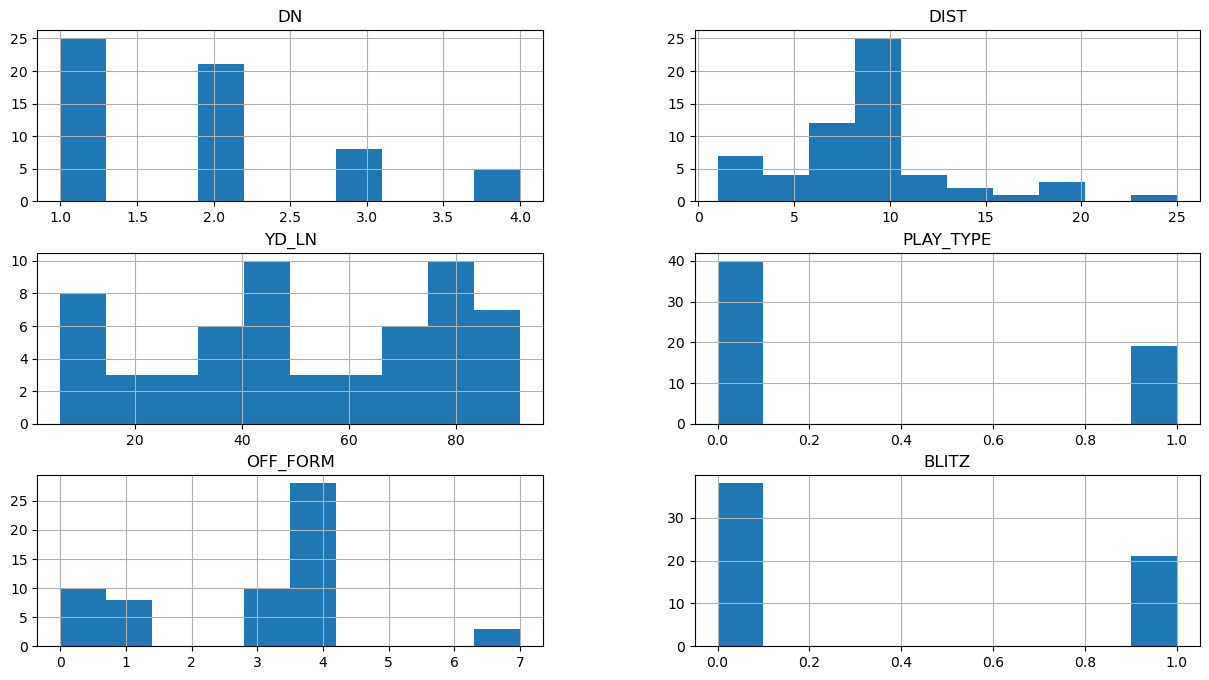

In [336]:
train_data.hist(figsize=(15,8))

In [337]:
train_data.corr()

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
DN,1.000000,-0.296459,-0.029599,0.125534,0.150655,0.056150
DIST,-0.296459,1.000000,0.153296,0.146098,-0.239435,0.228740
YD_LN,-0.029599,0.153296,1.000000,-0.014041,-0.314091,0.081846
PLAY_TYPE,0.125534,0.146098,-0.014041,1.000000,0.256466,0.321020
OFF_FORM,0.150655,-0.239435,-0.314091,0.256466,1.000000,-0.094144
BLITZ,0.056150,0.228740,0.081846,0.321020,-0.094144,1.000000


In [338]:
train_data["DN"] = np.log(train_data["DN"]+1)
train_data["DIST"] = np.log(train_data["DIST"]+1)
train_data["YD_LN"] = np.log(train_data["YD_LN"]+1)
train_data["PLAY_TYPE"] = np.log(train_data["PLAY_TYPE"]+1)
train_data["OFF_FORM"] = np.log(train_data["OFF_FORM"]+1)
train_data["BLITZ"] = np.log(train_data["BLITZ"]+1)


In [339]:
train_data

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
73,1.098612,2.302585,4.406719,0.693147,2.079442,0.000000
41,1.098612,2.484907,4.248495,0.000000,0.693147,0.000000
53,1.098612,1.609438,3.555348,0.000000,0.693147,0.000000
4,1.098612,1.945910,4.317488,0.000000,0.693147,0.000000
15,1.098612,2.639057,2.639057,0.693147,1.609438,0.693147
52,1.386294,2.639057,2.639057,0.000000,1.609438,0.000000
42,1.098612,0.693147,3.737670,0.000000,0.000000,0.000000
48,1.609438,1.098612,3.367296,0.000000,1.386294,0.000000
33,1.386294,2.079442,3.806662,0.693147,1.609438,0.000000
57,1.098612,2.397895,3.828641,0.000000,1.609438,0.693147


array([[<Axes: title={'center': 'DN'}>, <Axes: title={'center': 'DIST'}>],
       [<Axes: title={'center': 'YD_LN'}>,
        <Axes: title={'center': 'PLAY_TYPE'}>],
       [<Axes: title={'center': 'OFF_FORM'}>,
        <Axes: title={'center': 'BLITZ'}>]], dtype=object)

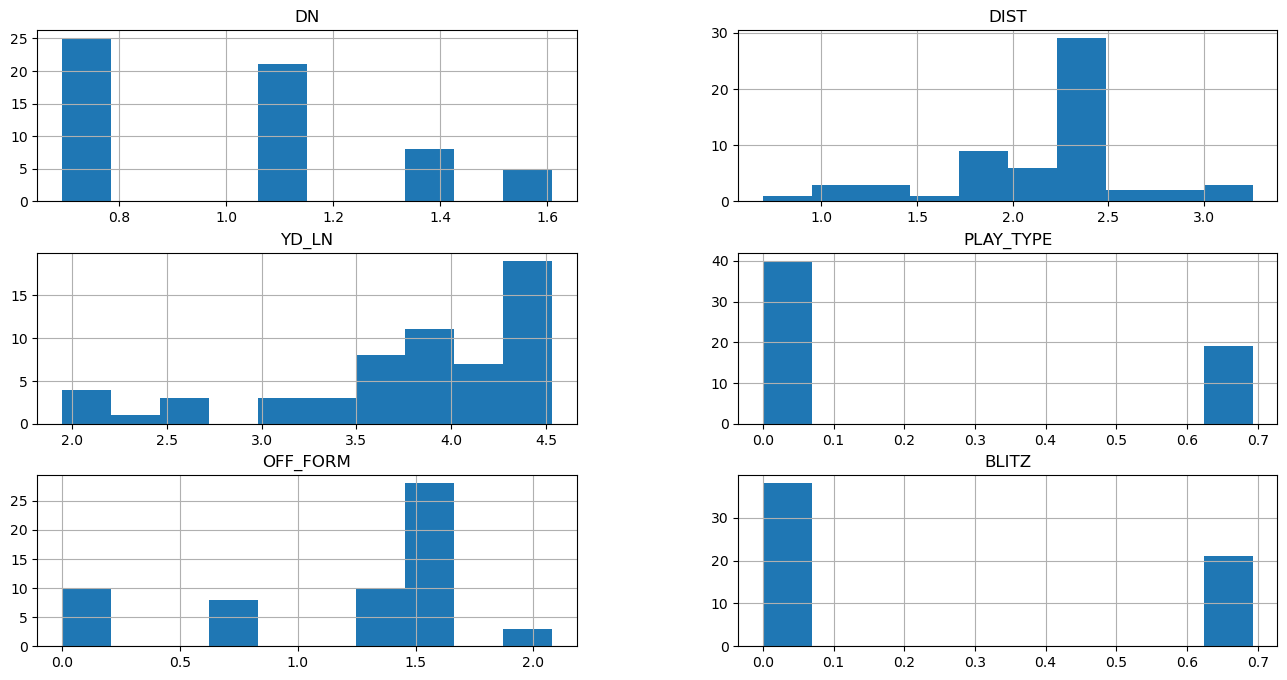

In [340]:
train_data.hist(figsize=(16,8))

In [341]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 73 to 65
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DN         59 non-null     float64
 1   DIST       59 non-null     float64
 2   YD_LN      59 non-null     float64
 3   PLAY_TYPE  59 non-null     float64
 4   OFF_FORM   59 non-null     float64
 5   BLITZ      59 non-null     float64
dtypes: float64(6)
memory usage: 5.3 KB


<Axes: >

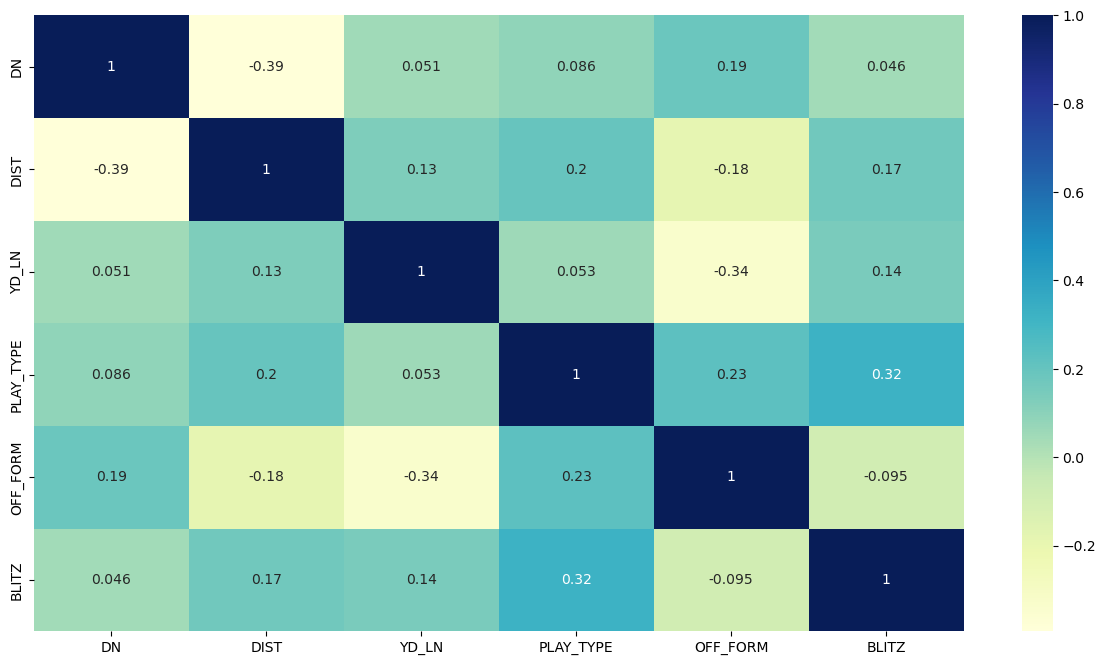

In [342]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['BLITZ'], axis=1), train_data['BLITZ']
X_train_s = scaler.fit_transform(X_train)
    
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [344]:
test_data = X_test.join(y_test)

test_data["DN"] = np.log(test_data["DN"]+1)
test_data["DIST"] = np.log(test_data["DIST"]+1)
test_data["YD_LN"] = np.log(test_data["YD_LN"]+1)
test_data["PLAY_TYPE"] = np.log(test_data["PLAY_TYPE"]+1)
test_data["OFF_FORM"] = np.log(test_data["OFF_FORM"]+1)
test_data["BLITZ"] = np.log(test_data["BLITZ"]+1)


In [345]:
test_data

,DN,DIST,YD_LN,PLAY_TYPE,OFF_FORM,BLITZ
13,0.693147,2.397895,3.828641,0.000000,0.000000,0.693147
51,0.693147,2.397895,3.931826,0.000000,0.693147,0.000000
2,0.693147,2.397895,4.553877,0.693147,1.945910,0.000000
39,0.693147,2.397895,4.262680,0.000000,1.098612,0.000000
7,0.693147,2.397895,3.295837,0.000000,1.386294,0.000000
43,1.386294,2.079442,3.526361,0.000000,0.000000,0.693147
32,1.098612,2.397895,3.871201,0.000000,1.609438,0.000000
9,1.386294,2.944439,3.367296,0.693147,1.609438,0.693147
66,0.693147,2.639057,3.401197,0.000000,0.000000,0.000000
58,0.693147,2.397895,3.931826,0.000000,2.079442,0.000000


In [346]:
X_test, y_test = test_data.drop(['BLITZ'], axis=1), test_data['BLITZ']

In [347]:
X_test_s = scaler.fit_transform(X_test)

In [348]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 13 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DN         15 non-null     float64
 1   DIST       15 non-null     float64
 2   YD_LN      15 non-null     float64
 3   PLAY_TYPE  15 non-null     float64
 4   OFF_FORM   15 non-null     float64
 5   BLITZ      15 non-null     float64
dtypes: float64(6)
memory usage: 1.4 KB


In [349]:
reg.score(X_test_s, y_test)

0.06624633566804394

In [350]:
reg.score(X_train_s, y_train)

0.14730988685146384

In [351]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [352]:
RandomForestRegressor()

RandomForestRegressor()

In [353]:
forest.score(X_test_s, y_test)

/Users/jpulattie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.10938636363636345

In [354]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [30, 50, 100, 200],
    "max_features": [2,4,6,8],
    "min_samples_split": [2,4,6],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [355]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=4, max_features=2, n_estimators=200)

In [356]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, y_test)

0.05081522385261239